In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [68]:
# Weight is the dependent variable
df = pd.read_csv('Fish_dataset.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [69]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

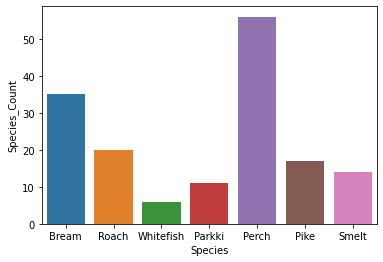

In [70]:
df['Species_Count'] = df['Species'].map({'Perch':56,'Bream':35,'Roach':20,'Pike':17,'Smelt':14,'Parkki':11,'Whitefish':6})
bar, ax = plt.subplots()
ax = sns.barplot(x='Species', y=df['Species_Count'], data=df)

In [71]:
df.shape

(159, 8)

In [72]:
q1 = df['Weight'].quantile(0.25)
q3 = df['Weight'].quantile(0.75)
iqr = abs(q3 - q1)
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
df = df[(df['Weight']>lower_limit)&(df['Weight']<upper_limit)]
df = df.dropna()
df.shape

(156, 8)

In [73]:
# One hot encoding data
x = df.drop(['Weight','Species_Count'], axis='columns')
y = df['Weight']

x = pd.get_dummies(x)
x.head()

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [74]:
# Splitting
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

train_data = pd.concat([x_train,y_train], axis='columns')
test_data = pd.concat([x_test,y_test], axis='columns')

for i in train_data.columns:
    print(i+"+", end="")

Length1+Length2+Length3+Height+Width+Species_Bream+Species_Parkki+Species_Perch+Species_Pike+Species_Roach+Species_Smelt+Species_Whitefish+Weight+

In [75]:
from scipy.stats import kstest
print(kstest(y, 'norm'))
# p value = 0 => Reject H0 

from scipy.stats import anderson
print(anderson(y, 'norm'))

from scipy.stats import shapiro
print(shapiro(y))
# p value = 0 => Reject H0

KstestResult(statistic=0.9935897417722358, pvalue=0.0)
AndersonResult(statistic=5.591147500315174, critical_values=array([0.562, 0.64 , 0.768, 0.896, 1.066]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
ShapiroResult(statistic=0.897249698638916, pvalue=5.5507900498241725e-09)


In [76]:
from statsmodels.formula.api import ols
lmodel = ols('Weight~Length1+Length2+Length3+Height+Width+Species_Bream+Species_Parkki+Species_Perch+Species_Pike+Species_Roach+Species_Smelt+Species_Whitefish',data=train_data).fit()
lmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     152.1
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           4.99e-56
Time:                        17:21:36   Log-Likelihood:                -628.47
No. Observations:                 109   AIC:                             1281.
Df Residuals:                      97   BIC:                             1313.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -496.3772     59.485     -8.345      0.000    -614.438    -378.317
Length1               9.6572     40.629      0.238      0.813     -70.980      90.295
Length2              54.0057     45.777      1.180      0.241     -36.849     144.860
Length3             -50.2613     33.656     -1.493      0.139    -117.059      16.536
Height               62.8456     16.049      3.916      0.000      30.992      94.699
Width                45.1325     27.604      1.635      0.105      -9.654      99.919
Species_Bream      -238.3859     92.673     -2.572      0.012    -422.315     -54.456
Species_Parkki     -209.8052     48.799     -4.299      0.000    -306.658    -112.953
Species_Perch       -78.1399     38.656     -2.021      0.046    -154.862      -1.418
Species_Pike        -12.5881     95.912     -0.131      0.896    -202.948     177.771
Species_Roach       -67.2286     26.011     -2.585      0.011    -118.853     -15.604
Species_Smelt       209.1598     40.177      5.206      0.000     129.420     288.899
Species_Whitefish   -99.3892     41.033     -2.422      0.017    -180.828     -17.950
==============================================================================
Omnibus:                       23.981   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.850
Skew:                           0.998   Prob(JB):                     6.04e-09
Kurtosis:                       5.086   Cond. No.                     6.74e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.5e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [77]:
y_pred_train = lmodel.predict(x_train)
y_pred_test = lmodel.predict(x_test)

from sklearn.metrics import mean_squared_error
import numpy as np
np.sqrt(mean_squared_error(y_train,y_pred_train)),np.sqrt(mean_squared_error(y_test,y_pred_test))

(77.23671820450521, 76.63620101792768)

In [78]:
# Heteroskedasticity test
from statsmodels.stats.diagnostic import het_breuschpagan,het_white, het_goldfeldquandt
print(het_goldfeldquandt(y_train,x_train))

# Autocorrelation test
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(lmodel.resid))

(0.752170009187922, 0.8210940376083031, 'increasing')
2.1414680413217915


In [79]:
# VIF > 5 => high multicollinearity => undesirable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(x_train.shape[1]):
    v = variance_inflation_factor(x_train.values,i)
    vif.append(v)
    
vif

[2342.8939853371676,
 3425.3969665957884,
 2201.347771230119,
 78.35535183237441,
 36.3383330848073,
 66.04376670154194,
 6.193330302607298,
 13.785074474196474,
 24.855241183428802,
 9.767122563608968,
 3.620328198681016,
 3.628759156434598]

In [80]:
# PCA to reduce multicollinearity
# Data should be normal for PCA
from sklearn.decomposition import PCA

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

pca_train = PCA()
pca_train.fit(x_train)
x_train_pca = pca_train.transform(x_train)

pca_test = PCA()
pca_test.fit(x_test)
x_test_pca = pca_train.transform(x_test)

pca_train.explained_variance_ratio_.cumsum()

array([0.32321603, 0.59326178, 0.73050999, 0.84147256, 0.9196548 ,
       0.96529437, 0.9980922 , 0.99932313, 0.99997595, 0.99999179,
       1.        , 1.        ])

In [81]:
pca_train_df = pd.DataFrame(data=x_train_pca, columns=['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12' ])
pca_test_df = pd.DataFrame(data=x_test_pca, columns=['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12' ])

pca_train_df['target'] = y_train.values
pca_test_df['target'] = y_test.values

lmodel_pca = ols('target~PC1+PC2+PC3+PC4+PC5', data=pca_train_df).fit()

pred_train = lmodel_pca.predict(pca_train_df)
pred_test = lmodel_pca.predict(pca_test_df) 

from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(pca_train_df['target'],pred_train)
mse_test = mean_squared_error(pca_test_df['target'], pred_test)

import numpy as np
np.sqrt(mse_train), np.sqrt(mse_test)

(120.36988209914874, 104.69960719100173)

In [82]:
lmodel_pca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     110.7
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           2.24e-42
Time:                        17:22:08   Log-Likelihood:                -676.84
No. Observations:                 109   AIC:                             1368.
Df Residuals:                     102   BIC:                             1387.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    368.7257     11.918     30.938      0.000     345.086     392.366
PC1          408.7947     20.565     19.878      0.000     368.004     449.586
PC2          293.2078     22.499     13.032      0.000     248.581     337.834
PC3          136.4666     31.559      4.324      0.000      73.869     199.064
PC4          100.5629     35.099      2.865      0.005      30.945     170.181
PC5          -89.7708     41.814     -2.147      0.034    -172.709      -6.832
PC6          450.7974     54.728      8.237      0.000     342.245     559.350
==============================================================================
Omnibus:                        9.154   Durbin-Watson:                   2.464
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               13.682
Skew:                          -0.370   Prob(JB):                      0.00107
Kurtosis:                       4.570   Cond. No.                         4.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""